In [3]:
import pandas as pd
import numpy as np
import geopandas as gpd
import os
import matplotlib.pyplot as plt
import altair as alt
from Utilities import Utils

In [4]:
byage = pd.read_csv("data\\USCS-1999-2018-ASCII\\BYAGE.TXT", sep="|", low_memory=False)

bycounty = pd.read_csv("data\\USCS-1999-2018-ASCII\\BYAREA_COUNTY.TXT", sep="|", low_memory=False)

In [5]:
byarea = pd.read_csv("data\\USCS-1999-2018-ASCII\\BYAREA.TXT", sep="|", low_memory=False)
byarea = byarea[['AREA', 'AGE_ADJUSTED_RATE','EVENT_TYPE', 'RACE', 'SEX', 'SITE', 'YEAR']]
byarea = byarea[byarea["YEAR"] != '2014-2018']
byarea = byarea[byarea["RACE"] == "All Races"]
byarea = byarea.astype({'YEAR': 'int'})
byarea = byarea[(byarea["SITE"] == "All Cancer Sites Combined") & (byarea["SEX"] == "Male and Female")]
byarea = Utils.remove_rows(byarea, ['~', '+', '.', '-'])
byarea = Utils.get_mir(byarea, ['AREA', 'RACE', 'SEX', 'SITE', 'YEAR'], 'AGE_ADJUSTED_RATE')
byarea = byarea[["AREA","YEAR","MIR"]]
byarea = byarea.sort_values(['YEAR'])

In [6]:
grouped = byarea.groupby(by="AREA")

In [7]:
state_change = (grouped['MIR'].last() - grouped['MIR'].first())/grouped['MIR'].first()

In [8]:
print("Worst Improvement: " + str(state_change.idxmax()) + " " + str(state_change.max()))
print("Best improvement: " + str(state_change.idxmin()) + " " + str(state_change.min()))

Worst Improvement: New Mexico -0.02892027050256729
Best improvement: Tennessee -0.3241981863975525


<AxesSubplot:xlabel='YEAR'>

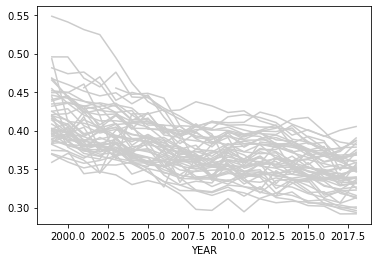

In [9]:
byarea.pivot_table(values=["MIR"], columns=["AREA"], index=["YEAR"]).plot(color="#CCCCCC", legend=False)


In [11]:
states = byarea["AREA"].unique()
states = states.sort() 
state_dropdown = alt.binding_select(options=states)
state_select = alt.selection_single(fields=['AREA'], bind=state_dropdown, name="State")
state_color_condition = alt.condition(state_select, alt.Color('AREA:N', legend=None), alt.value('lightgray'))
alt.Chart(byarea).mark_line().encode(
    x='YEAR',
    y='MIR',
    detail="AREA",
    tooltip="AREA",
).add_selection(state_select).encode(
    color=state_color_condition
)

SchemaValidationError: Invalid specification

        altair.vegalite.v4.schema.core.BindRadioSelect->options, validating 'type'

        None is not of type 'array'
        